<a href="https://colab.research.google.com/github/TechSlinger/CODSOFT/blob/master/Task2_MOVIE_RATING_PREDICTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Step 1: Load the data
data = pd.read_csv("IMDb Movies India.csv", encoding='latin1')
# Step 2: Explore the data

# Step 3: Preprocess the data
# Handle missing values (example: dropping rows with missing ratings)
data = data.dropna(subset=['Rating'])

# Encode categorical features
categorical_features = ['Name', 'Genre', 'Director', 'Actor 1', 'Actor 2', 'Actor 3']
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
encoded_features = pd.DataFrame(encoder.fit_transform(data[categorical_features]))
# Rename the encoded columns
encoded_features.columns = encoder.get_feature_names_out(categorical_features)

# Concatenate the encoded features with the original dataframe
data = pd.concat([data.reset_index(drop=True), encoded_features.reset_index(drop=True)], axis=1)
data = data.drop(columns=categorical_features)
#Preprocess the Year feature
# Step 1: Remove parentheses and convert to numeric
data['Year'] = data['Year'].str.replace(r'\(|\)', '', regex=True)  # Remove parentheses
data['Year'] = pd.to_numeric(data['Year'], errors='coerce')  # Convert to numeric, set errors to NaN

# Step 2: Handle missing values
data = data.dropna(subset=['Year'])  # Drop rows where 'Year' is NaN
#Preprocess the Duration feature
# Step 1: Remove parentheses and convert to numeric
data['Duration'] = data['Duration'].str.replace(r'min', '', regex=True)  # Remove parentheses
data['Votes'] = data['Votes'].astype(str).str.replace(r'[^\d]', '', regex=True)
data['Duration'] = pd.to_numeric(data['Duration'], errors='coerce')  # Convert to numeric, set errors to NaN

# Step 2: Handle missing values
data = data.dropna(subset=['Duration'])  # Drop rows where 'Year' is NaN

data = data.dropna(subset=['Votes'])

# Step 4: Split the data into training and testing sets
X = data.drop(columns=['Rating'])
y = data['Rating']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



# Step 5: Create and train the RandomForestRegressor model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


# Step 6: Evaluate the model
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R-squared (R²): {r2}')


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Mean Absolute Error (MAE): 0.8302792485055509
Mean Squared Error (MSE): 1.2803455311699405
Root Mean Squared Error (RMSE): 1.1315235442402163
R-squared (R²): 0.3118332655041214


KeyError: "['Genre'] not in index"

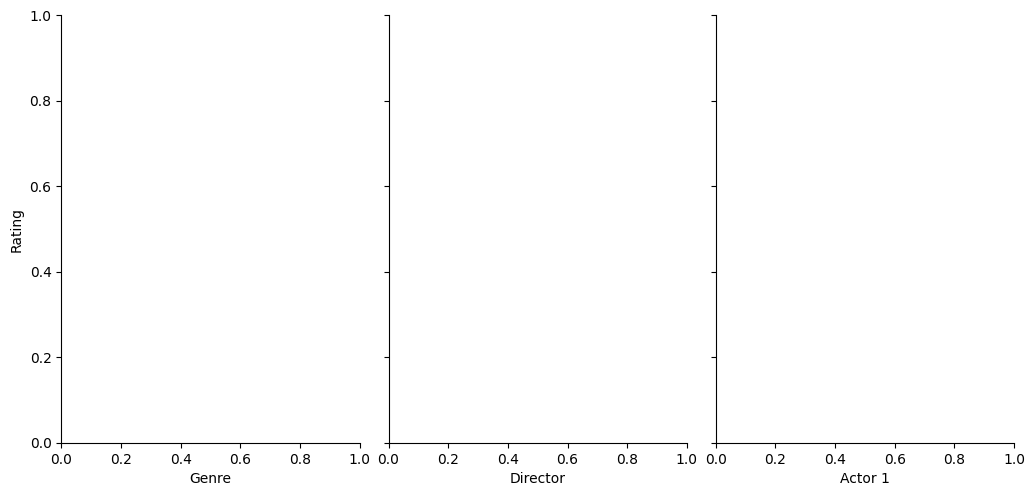

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Pairplot to visualize relationships between features and target
sns.pairplot(data, x_vars=['Genre', 'Director', 'Actor 1'], y_vars='Rating', height=5, aspect=0.7, kind='scatter')
plt.show()


In [7]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR

# Define a function to evaluate models
def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    print(f'{model.__class__.__name__}:')
    print(f'Mean Absolute Error (MAE): {mae}')
    print(f'Mean Squared Error (MSE): {mse}')
    print(f'Root Mean Squared Error (RMSE): {rmse}')
    print(f'R-squared (R²): {r2}\n')

# Initialize models
models = [
    DecisionTreeRegressor(random_state=42),
    RandomForestRegressor(random_state=42),
    GradientBoostingRegressor(random_state=42),
    SVR()
]

# Evaluate each model
for model in models:
    evaluate_model(model, X_train, X_test, y_train, y_test)


DecisionTreeRegressor:
Mean Absolute Error (MAE): 1.0532877882152007
Mean Squared Error (MSE): 2.0569598633646455
Root Mean Squared Error (RMSE): 1.4342105366244684
R-squared (R²): -0.10558542026328421

RandomForestRegressor:
Mean Absolute Error (MAE): 0.8302792485055509
Mean Squared Error (MSE): 1.2803455311699405
Root Mean Squared Error (RMSE): 1.1315235442402163
R-squared (R²): 0.3118332655041214

GradientBoostingRegressor:
Mean Absolute Error (MAE): 0.8689243479183224
Mean Squared Error (MSE): 1.2965709806368813
Root Mean Squared Error (RMSE): 1.1386707077276035
R-squared (R²): 0.303112327051523

SVR:
Mean Absolute Error (MAE): 1.0656315874502322
Mean Squared Error (MSE): 1.8510767500214784
Root Mean Squared Error (RMSE): 1.360542814475707
R-squared (R²): 0.0050736997539095885

